In [1]:
import pandas as pd
emissionData = pd.read_csv('dataset/greenhouse-gas-emissions-in-the-netherlands/emission.csv', delimiter = ';')
emissionDetailData = pd.read_csv('dataset/greenhouse-gas-emissions-in-the-netherlands/emission_detail.csv', delimiter = ';')
metadata = pd.read_csv('dataset/greenhouse-gas-emissions-in-the-netherlands/metadata.csv', delimiter = ';', skiprows=1)
sortedData = emissionData.sort_values(by='Perioden')

In [2]:
from IPython.display import display
dataCO2_1 = emissionData['CO2_1']
dataCH4_2 = emissionData['CH4_2']
dataN20_3 = emissionData['N2O_3']

def describe(data, name):
    overview = pd.DataFrame({name:['Min','Max','Mean','Mode','Median','Variance','Std','Skewness','Kurtosis'], 
                         'Value':[int(data.min()),int(data.max()),float(data.mean()),data.mode().get(0,0),
                                  int(data.median()), float(data.var()),float(data.std())
                                  ,float(data.skew()),float(data.kurtosis())]})
    display(overview)

In [3]:
describe(dataCO2_1, 'CO2_1')
describe(dataCH4_2, 'CH4_2')
describe(dataN20_3, 'N20_3')

CO2_1         Value
0       Min  3.000000e+01
1       Max  1.824400e+05
2      Mean  2.567302e+04
3      Mode  4.000000e+01
4    Median  1.006500e+04
5  Variance  1.664568e+09
6       Std  4.079911e+04
7  Skewness  2.478482e+00
8  Kurtosis  5.597452e+00

CH4_2         Value
0       Min      0.000000
1       Max   1278.000000
2      Mean    129.603038
3      Mode      0.000000
4    Median      2.000000
5  Variance  76324.830798
6       Std    276.269489
7  Skewness      2.121462
8  Kurtosis      3.285010

N20_3       Value
0       Min    0.000000
1       Max   59.000000
2      Mean    5.987808
3      Mode    0.030000
4    Median    0.000000
5  Variance  153.342715
6       Std   12.383163
7  Skewness    2.261290
8  Kurtosis    4.607188

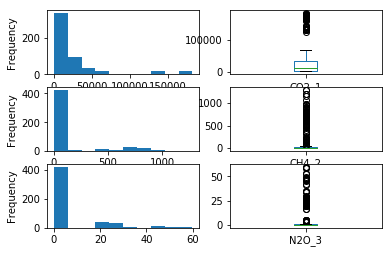

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axs = plt.subplots(3,2)
dataCO2_1.plot(kind='hist', ax=axs[0][0])
dataCO2_1.plot(kind='box', ax=axs[0][1])
dataCH4_2.plot(kind='hist', ax=axs[1][0])
dataCH4_2.plot(kind='box', ax=axs[1][1])
dataN20_3.plot(kind='hist', ax=axs[2][0])
dataN20_3.plot(kind='box', ax=axs[2][1])
plt.show()

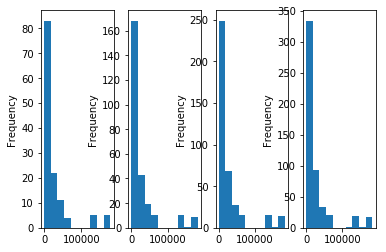

In [5]:
fig, axs = plt.subplots(1,4)
sortedDataCO2_1 = sortedData['CO2_1']
for i in range(4):
    sortedDataCO2_1.head(int(sortedDataCO2_1.count())*(i+1)//4).plot(kind = 'hist', ax=axs[i])
plt.show()
#Dari histogram dibawah, dapat dilihat bahwa meskipun data ditambah, namun proporsi histogram masih relatif sama
#Maka dari itu, kami menyimpulkan bahwa data CO2_1 berdistribusi binomial

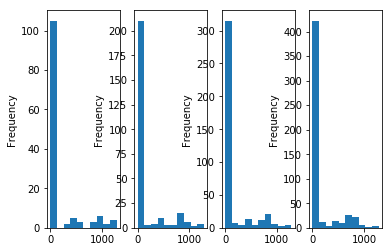

In [6]:
fig, axs = plt.subplots(1,4)
sortedDataCH4_2 = sortedData['CH4_2']
for i in range(4):
    sortedDataCH4_2.head(int(sortedDataCH4_2.count())*(i+1)//4).plot(kind = 'hist', ax=axs[i])
plt.show()
#Dari histogram dibawah, dapat dilihat bahwa saat data ditambah, terdapat noise pada data
#Maka dari itu, kami menyimpulkan bahwa data CH4_2 berdistribusi Eksponensial

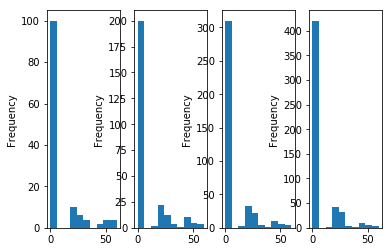

In [7]:
fig, axs = plt.subplots(1,4)
sortedDataN2O_3 = sortedData['N2O_3']
for i in range(4):
    sortedDataN2O_3.head(int(sortedDataN2O_3.count())*(i+1)//4).plot(kind = 'hist', ax=axs[i])
plt.show()
#Dari histogram dibawah, dapat dilihat bahwa saat data ditambah, terdapat noise pada data
#Maka dari itu, kami menyimpulkan bahwa data N2O_3 berdistribusi Eksponensial

CO2_1
H0: CO2_1 pada sektor T001176 berdistribusi normal
P value: 0.7493051364681883
H0: CO2_1 pada sektor T001176 berdistribusi chi-squared
P value: 0.0

CH4_2
H0: CH4_2 pada sektor T001176 berdistribusi normal
P value: 0.00037789631088722836
H0: CH4_2 pada sektor T001176 berdistribusi chi-squared
P value: 2.414203055886831e-97

N2O_3
H0: N2O_3 pada sektor T001176 berdistribusi normal
P value: 0.02880733159943421
H0: N2O_3 pada sektor T001176 berdistribusi chi-squared
P value: 5.97237156296469e-08



T001176(CH4_2)         Value
0            Min    718.000000
1            Max   1278.000000
2           Mean    847.435000
3           Mode    718.960000
4         Median    786.000000
5       Variance  23015.802374
6            Std    151.709599
7       Skewness      1.911761
8       Kurtosis      3.285628

T001176(N2O_3)       Value
0            Min   26.000000
1            Max   59.000000
2           Mean   38.995000
3           Mode   26.430000
4         Median   35.000000
5       Variance  145.976026
6            Std   12.082054
7       Skewness    0.354281
8       Kurtosis   -1.500772

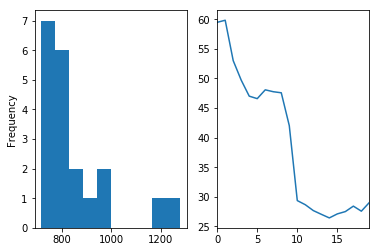

1.0
19    548.78939
19    548.78939
19    548.78939
19    548.78939
19    548.78939
19    548.78939
Name: CH4_2, dtype: float64
19    25.876793
19    25.876793
19    25.876793
19    25.876793
19    25.876793
19    25.876793
Name: N2O_3, dtype: float64


In [8]:
#Soal 1.
from scipy import stats
emissionDataT001176 = emissionData.loc[emissionData['Bronnen'] == 'T001176  ']

gas = ["CO2_1", "CH4_2", "N2O_3"]

for gasVal in gas:
    k1, p1 = stats.normaltest(emissionDataT001176[gasVal].values)
    k2, p2 = stats.chisquare(emissionDataT001176[gasVal].values)
    print(gasVal)
    print("H0: "+gasVal +" pada sektor T001176 berdistribusi normal")
    print("P value: " + str(p1))
    print("H0: "+gasVal +" pada sektor T001176 berdistribusi chi-squared")
    print("P value: " + str(p2))
    print()

#Untuk CO2_1, karena P value untuk data berdistribusi normal > 0.05, kita asumsikan bahwa ia berdistribusi normal
#Untuk CH4_2, ia bukan merupakan normal dan chi-squared. Dari plot histogram yang terjadi kami simpulkan bahwa ia berdistribusi eksponensial
#Untuk N2O_3, ia bukan merupakan normal dan chi-squared. Dari plot line yang terjadi kami simpulkan bahwa ia berdistribusi logaritmik
fig, axs = plt.subplots(1,2)
emissionDataT001176["CH4_2"].plot(kind='hist', ax=axs[0])
describe(emissionDataT001176["CH4_2"], "T001176(CH4_2)")
emissionDataT001176["N2O_3"].plot(ax=axs[1])
describe(emissionDataT001176["N2O_3"], "T001176(N2O_3)")
plt.show()
print(stats.norm(loc=emissionDataT001176["CH4_2"].mean(), scale=emissionDataT001176["CH4_2"].std()).cdf(12000))
#Kita asumsikan data akan berkurang secara logaritmik
print(emissionDataT001176["CH4_2"][2]*emissionDataT001176["CH4_2"][emissionDataT001176.count()-1]/emissionDataT001176["CH4_2"][0])
print(emissionDataT001176["N2O_3"][2]*emissionDataT001176["N2O_3"][emissionDataT001176.count()-1]/emissionDataT001176["N2O_3"][0])
#Dikarenakan N2O_3 akan berada diatas ambang batas, maka kemungkinan terjadinya global warming adalah 100%

H0: Average pada sektor 305800 berdistribusi normal
P value: 0.37466117550364464
H0: Average pada sektor 305800 berdistribusi chi-squared
P value: 0.0001804472413705442


305800(avg)        Value
0         Min   554.000000
1         Max   684.000000
2        Mean   606.676333
3        Mode   554.096667
4      Median   597.000000
5    Variance  1566.255686
6         Std    39.575948
7    Skewness     0.662136
8    Kurtosis    -0.536379

Ekspektasi emisi dari sektor ekstraksi minyak bumi untuk rata-rata semua emisi gas tidak lebih dari 1500:
1.0


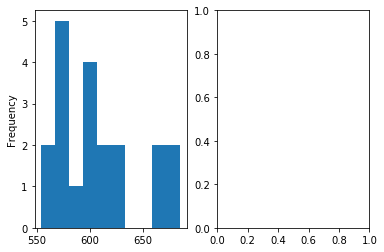

In [9]:
#Soal 2a.
emissionData305800 = emissionData.loc[emissionData['Bronnen'] == '305800   ']
avg305800 = []
for index, row in emissionData305800.iterrows():
    avg305800.append((float(row['CO2_1'])+float(row['CH4_2'])+float(row['N2O_3']))/3)
emissionData305800 = emissionData305800.assign(Average=pd.Series(avg305800).values)

k1, p1 = stats.normaltest(emissionData305800["Average"].values)
k2, p2 = stats.chisquare(emissionData305800["Average"].values)
print("H0: Average pada sektor 305800 berdistribusi normal")
print("P value: " + str(p1))
print("H0: Average pada sektor 305800 berdistribusi chi-squared")
print("P value: " + str(p2))
fig, axs = plt.subplots(1,2)
emissionData305800["Average"].plot(kind='hist', ax=axs[0])
describe(emissionData305800["Average"], "305800(avg)")

#Dikarenakan H0 test tidak menolak normal distribution dan data tersebut memiliki skewness dan kurtosis yang berdistribusi normal, maka kami asumsikan ia berdistribusi normal
print("Ekspektasi emisi dari sektor ekstraksi minyak bumi untuk rata-rata semua emisi gas tidak lebih dari 1500:")
print(stats.norm(loc=emissionData305800["Average"].mean(), scale=emissionData305800["Average"].std()).cdf(1500))

H0: Average pada sektor 346700 berdistribusi normal
P value: 0.06410782978464229
H0: Average pada sektor 346700 berdistribusi chi-squared
P value: 0.0


346700(avg)         Value
0         Min  1.327600e+04
1         Max  1.835300e+04
2        Mean  1.654350e+04
3        Mode  1.327625e+04
4      Median  1.665300e+04
5    Variance  1.466933e+06
6         Std  1.211170e+03
7    Skewness -9.786847e-01
8    Kurtosis  1.398492e+00

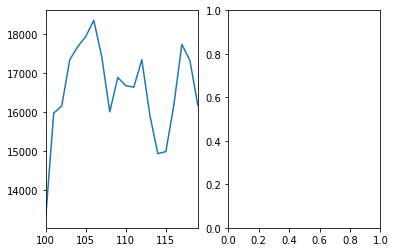

In [10]:
#Soal 2b.
emissionData346700 = emissionData.loc[emissionData['Bronnen'] == '346700   ']

avg346700 = []
for index, row in emissionData346700.iterrows():
    avg346700.append((float(row['CO2_1'])+float(row['CH4_2'])+float(row['N2O_3']))/3)
emissionData346700 = emissionData346700.assign(Average=pd.Series(avg346700).values)

k1, p1 = stats.normaltest(emissionData346700["Average"].values)
k2, p2 = stats.chisquare(emissionData346700["Average"].values)
print("H0: Average pada sektor 346700 berdistribusi normal")
print("P value: " + str(p1))
print("H0: Average pada sektor 346700 berdistribusi chi-squared")
print("P value: " + str(p2))
fig, axs = plt.subplots(1,2)
emissionData346700["Average"].plot(ax=axs[0])
describe(emissionData346700["Average"], "346700(avg)")
#Ia bukan merupakan normal dan chi-squared. Dari plot histogram yang terjadi kami simpulkan bahwa ia berdistribusi Gamma

In [11]:
#Soal 3
from math import sqrt

#xbar +- z*s/akar(n)
#z0.05 = 564.691
print(str(emissionData["CO2_1"].mean()-564.691*emissionData["CO2_1"].std()/sqrt(emissionData["CO2_1"].count())) + " <= population_mean <=" + str(emissionData["CO2_1"].mean()+564.691*emissionData["CO2_1"].std()/sqrt(emissionData["CO2_1"].count())))

-984649.2450173057 <= population_mean <=1035995.2834788442
